# **Regression Models**
---
* Simple Regression
    * Simple Linear Regression
    * Simple Non-Linear Regression
* Multiple Regression:
    * Multiple Linear Regression
    * Multiple Non-Linear Regression



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [53]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [55]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


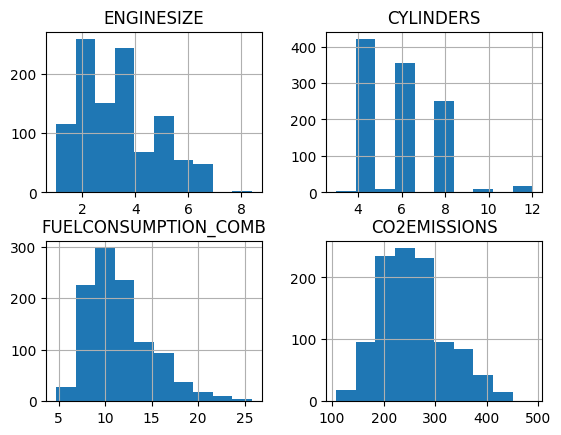

In [56]:
cdf.hist()
plt.show()

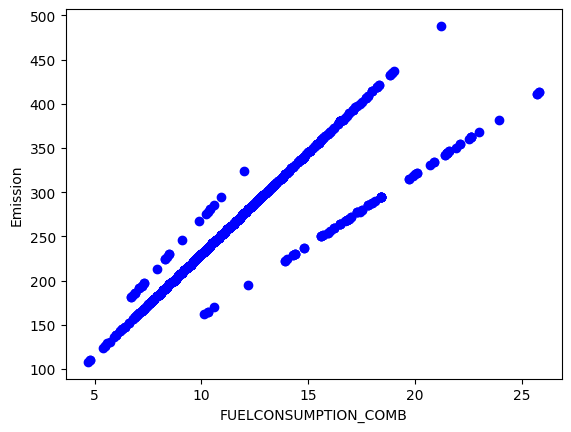

In [57]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show() 

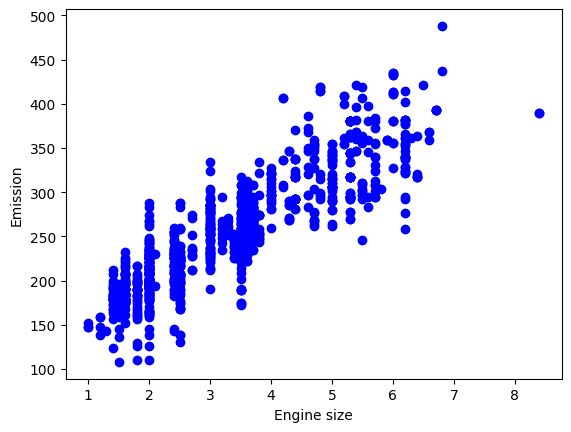

In [58]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

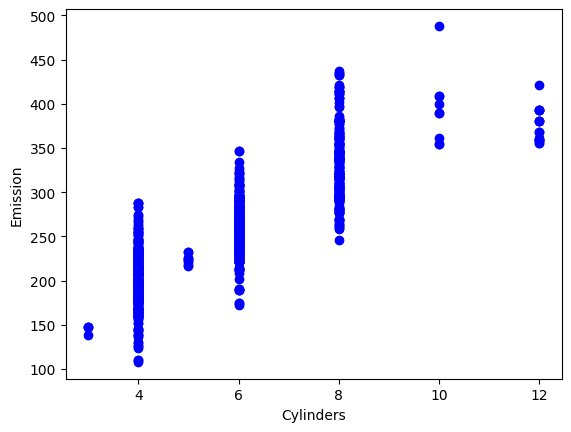

In [59]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

---
# **Simple Linear Regression**
---

In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cdf)

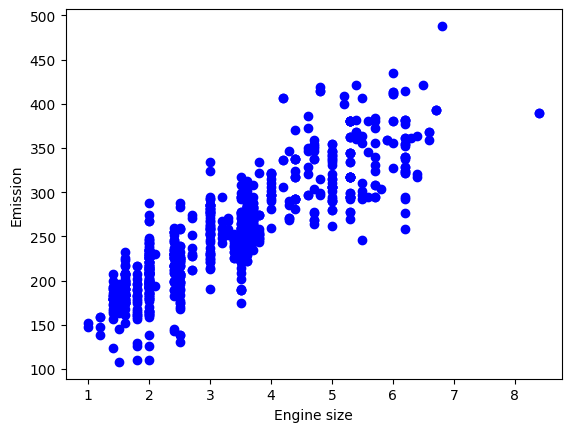

In [61]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train[["ENGINESIZE"]], train["CO2EMISSIONS"])

print("Coeficientes: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coeficientes:  [38.89704159]
Intercept:  125.59924823737575


Text(0, 0.5, 'Emission')

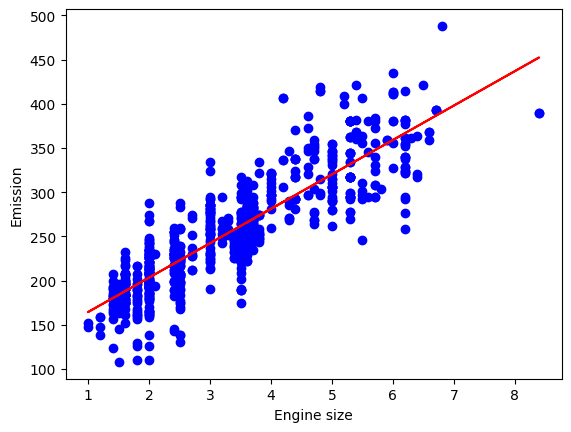

In [63]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train["ENGINESIZE"], reg.coef_[0]*train["ENGINESIZE"] + reg.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

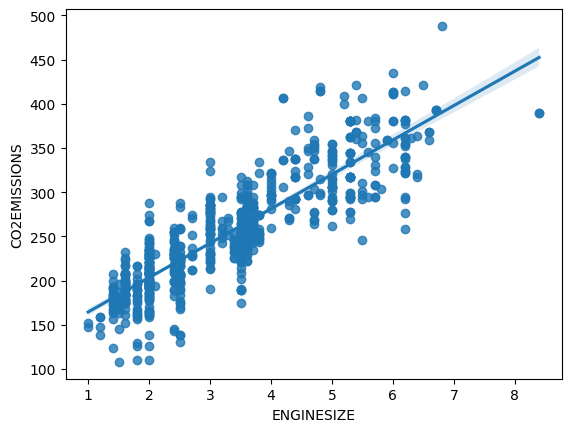

In [64]:
import seaborn as sns
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS",data=train)

In [65]:
test_x = test[["ENGINESIZE"]]

test_y = test[["CO2EMISSIONS"]]
test_y_ = reg.predict(test_x)

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error

print("Mean absolute error: %.2f" % mean_absolute_error(test_y, test_y_))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.34
R2-score: 0.79


---

In [77]:
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

train_y = train[["CO2EMISSIONS"]]

In [78]:
regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [79]:
predictions = regr.predict(test_x)

In [80]:
print("Mean absolute error: %.2f" % mean_absolute_error(test_y, predictions))

Mean absolute error: 21.46


---
# **Multiple Linear Regression**
---

In [81]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


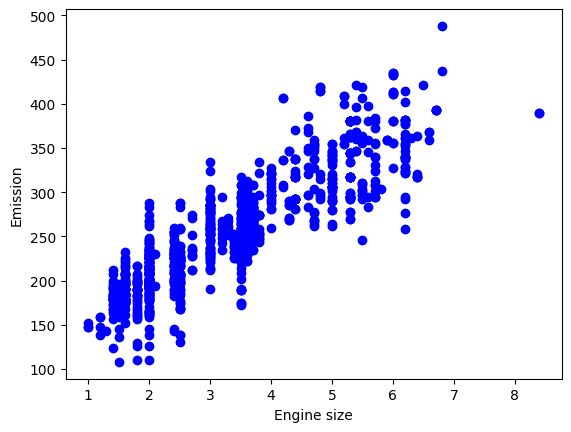

In [82]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [83]:
train, test = train_test_split(cdf)

In [84]:
x = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = train[["CO2EMISSIONS"]]

In [86]:
reg = LinearRegression()

reg.fit(x, y)

print("Coeficientes:", reg.coef_)

Coeficientes: [[11.14798923  6.96385179  9.79153092]]


In [89]:
from sklearn.metrics import mean_squared_error

y_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x_test = test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_test = test[['CO2EMISSIONS']]


print("Mean Squared Error (MSE) : %.2f" % mean_squared_error(y_hat, y_test))
print('Variance score: %.2f' % reg.score(x_test, y_test))

Mean Squared Error (MSE) : 516.92
Variance score: 0.87


---

In [90]:
X_train, X_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']], cdf[["CO2EMISSIONS"]])

In [91]:
reg.fit(X_train, y_train)

reg.coef_

array([[ 12.29795646,   6.57982481, -11.3210414 , -10.27672987,
         30.74721601]])

In [92]:
y_hat = reg.predict(X_test)
mean_squared_error(y_hat, y_test)

516.6540309904376

In [93]:
reg.score(X_test, y_test)

0.8724172183804737